In [37]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pyodbc
import pandas as pd

In [39]:
cnxn_str = ("Driver={ODBC Driver 17 for SQL Server};"

            "Server=DESKTOP-VQFAPB4;"

            "Database=DW_SupplyChain;"

            "Trusted_Connection=yes;")

In [40]:
cnxn = pyodbc.connect(cnxn_str)

In [41]:
# df = pd.read_sql("Select * from dim_unit", cnxn)
# print(df)

In [42]:
# Load data
query = """
SELECT 
    p.ProductPK, 
    p.productid, 
    b.brandname AS Product_Brand, 
    c.Category, 
    f.unit_price, 
    SUM(f.Total__TND) AS Total_Sales, 
    SUM(f.Quantity) AS Total_Quantity
FROM Fact_sales f
JOIN dim_product p ON f.ProductFK = p.ProductPK
JOIN dim_brand b ON f.BrandFK = b.brandPK
JOIN dim_category_brand c ON b.Category_FK = c.Category_PK
GROUP BY p.ProductPK, p.productid, b.brandname, f.unit_price, c.Category;
"""


In [43]:
df = pd.read_sql(query, cnxn)

# Check data
print(df.head())

C:\Users\PC HP 1\AppData\Local\Temp\ipykernel_12536\2125270516.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


   ProductPK productid               Product_Brand   Category  unit_price  \
0          2    PR-001                Walker Group  Fragrance  140.300003   
1          5    PR-002      Lyons, Zuniga and Wolf     Makeup  188.460007   
2          9    PR-003             Rogers-Thompson   Skincare  165.199997   
3         10    PR-004              Lewis and Sons   Bodycare  145.529999   
4         15    PR-005  Anthony, Colon and Jimenez   Skincare  102.370003   

    Total_Sales  Total_Quantity  
0  40967.601028             292  
1  67468.681427             358  
2  45429.999298             275  
3  49334.670044             339  
4  36238.981049             354  


In [44]:
import pandas as pd

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Product_Brand', 'Category'], drop_first=True)

# Display first rows
print(df_encoded.head())

   ProductPK productid  unit_price   Total_Sales  Total_Quantity  \
0          2    PR-001  140.300003  40967.601028             292   
1          5    PR-002  188.460007  67468.681427             358   
2          9    PR-003  165.199997  45429.999298             275   
3         10    PR-004  145.529999  49334.670044             339   
4         15    PR-005  102.370003  36238.981049             354   

   Product_Brand_Adams-Ellison  Product_Brand_Alexander-Gaines  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                           False   

   Product_Brand_Allen LLC  Product_Brand_Allen, Smith and Gordon  \
0                    False                                  False   
1                    False                              

In [45]:
df_encoded

,ProductPK,productid,unit_price,Total_Sales,Total_Quantity,Product_Brand_Adams-Ellison,Product_Brand_Alexander-Gaines,Product_Brand_Allen LLC,"Product_Brand_Allen, Smith and Gordon",Product_Brand_Alvarado Group,...,Product_Brand_Williams LLC,Product_Brand_Williams Ltd,"Product_Brand_Williams, Hill and Taylor",Product_Brand_Williams-Brewer,Product_Brand_Williamson Group,Product_Brand_Wright Ltd,Category_Fragrance,Category_Haircare,Category_Makeup,Category_Skincare
0,2,PR-001,140.300003,40967.601028,292,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,5,PR-002,188.460007,67468.681427,358,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9,PR-003,165.199997,45429.999298,275,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,10,PR-004,145.529999,49334.670044,339,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,15,PR-005,102.370003,36238.981049,354,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,4648,PR-2193,29.350000,8893.050121,303,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1197,4654,PR-2195,62.389999,21898.889999,351,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1198,4658,PR-2197,161.610001,62866.289825,389,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1199,4661,PR-2199,47.790001,15818.490105,331,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['unit_price', 'Total_Sales', 'Total_Quantity']

# Initialize and apply scaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print(df_encoded.head())

   ProductPK productid  unit_price  Total_Sales  Total_Quantity  \
0          2    PR-001    0.685511     0.300395       -0.670339   
1          5    PR-002    1.557523     1.589788        0.277453   
2          9    PR-003    1.136364     0.517510       -0.914467   
3         10    PR-004    0.780208     0.707489        0.004603   
4         15    PR-005   -0.001271     0.070327        0.220011   

   Product_Brand_Adams-Ellison  Product_Brand_Alexander-Gaines  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                           False   

   Product_Brand_Allen LLC  Product_Brand_Allen, Smith and Gordon  \
0                    False                                  False   
1                    False                                  Fa

C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

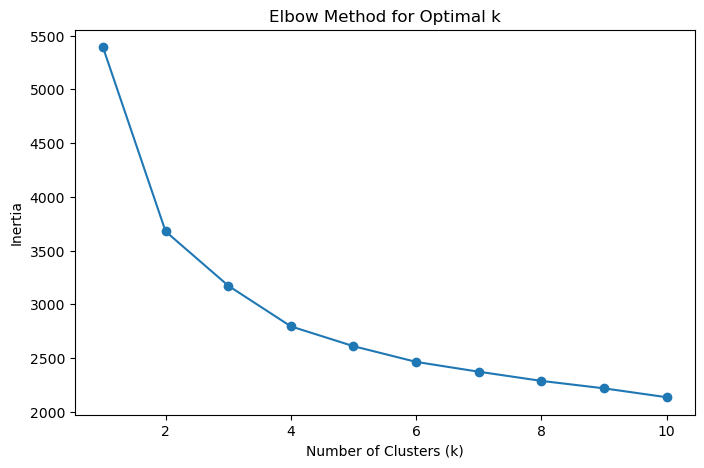

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find optimal clusters using Elbow Method
inertia = []
K_range = range(1, 11)  # Testing k=1 to k=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded.drop(columns=['ProductPK', 'productid']))
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [48]:
from sklearn.cluster import KMeans

# Apply K-Means with k = 3 (elbow point)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_encoded['Cluster_KMeans'] = kmeans.fit_predict(df_encoded.drop(columns=['ProductPK', 'productid']))

# Check assigned clusters
print(df_encoded[['productid', 'Cluster_KMeans']].head())

C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


  productid  Cluster_KMeans
0    PR-001               1
1    PR-002               1
2    PR-003               1
3    PR-004               1
4    PR-005               1


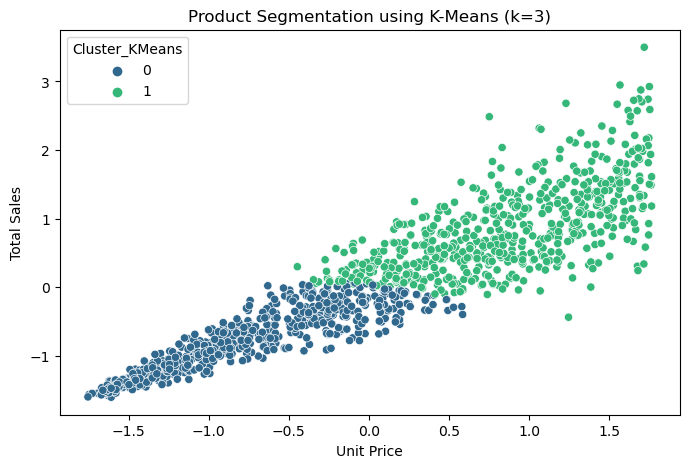

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded['unit_price'], y=df_encoded['Total_Sales'], hue=df_encoded['Cluster_KMeans'], palette='viridis')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.title('Product Segmentation using K-Means (k=2)')
plt.show()

In [50]:
# Group products by their assigned cluster
for cluster in sorted(df_encoded['Cluster_KMeans'].unique()):
    print(f"\n Products in Cluster {cluster}:")
    print(df_encoded[df_encoded['Cluster_KMeans'] == cluster]['productid'].values)


 Products in Cluster 0:
['PR-011' 'PR-012' 'PR-014' 'PR-016' 'PR-020' 'PR-021' 'PR-022' 'PR-024'
 'PR-025' 'PR-026' 'PR-030' 'PR-033' 'PR-034' 'PR-035' 'PR-036' 'PR-039'
 'PR-040' 'PR-041' 'PR-042' 'PR-043' 'PR-044' 'PR-045' 'PR-046' 'PR-047'
 'PR-048' 'PR-056' 'PR-057' 'PR-059' 'PR-060' 'PR-062' 'PR-063' 'PR-065'
 'PR-066' 'PR-069' 'PR-070' 'PR-072' 'PR-074' 'PR-075' 'PR-076' 'PR-078'
 'PR-080' 'PR-082' 'PR-084' 'PR-085' 'PR-086' 'PR-089' 'PR-090' 'PR-091'
 'PR-092' 'PR-094' 'PR-097' 'PR-102' 'PR-104' 'PR-108' 'PR-111' 'PR-112'
 'PR-116' 'PR-117' 'PR-122' 'PR-127' 'PR-128' 'PR-129' 'PR-130' 'PR-131'
 'PR-132' 'PR-133' 'PR-134' 'PR-135' 'PR-136' 'PR-137' 'PR-138' 'PR-139'
 'PR-140' 'PR-141' 'PR-143' 'PR-145' 'PR-146' 'PR-147' 'PR-149' 'PR-153'
 'PR-154' 'PR-155' 'PR-157' 'PR-159' 'PR-161' 'PR-162' 'PR-164' 'PR-165'
 'PR-170' 'PR-172' 'PR-173' 'PR-175' 'PR-176' 'PR-178' 'PR-179' 'PR-180'
 'PR-182' 'PR-185' 'PR-186' 'PR-190' 'PR-191' 'PR-198' 'PR-203' 'PR-211'
 'PR-213' 'PR-215' 'PR-217

In [51]:
df_encoded[['productid', 'Cluster_KMeans']].to_csv('product_clusters.csv', index=False)
print("✅ Clustered products saved to 'product_clusters.csv'")

✅ Clustered products saved to 'product_clusters.csv'


In [52]:
print(kmeans.cluster_centers_.shape)

(2, 206)


In [53]:
# Select only numerical features for clustering
features = ['unit_price', 'Total_Sales', 'Total_Quantity']
df_features = df_encoded[features]

# Apply K-Means again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Extract and display cluster centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features)
print(centroid_df)

C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


   unit_price  Total_Sales  Total_Quantity
0   -1.039424    -0.949344       -0.007102
1    0.551615     0.180974       -0.689159
2    0.851756     1.195788        0.902679


In [54]:
print(df_encoded.columns)

Index(['ProductPK', 'productid', 'unit_price', 'Total_Sales', 'Total_Quantity',
       'Product_Brand_Adams-Ellison', 'Product_Brand_Alexander-Gaines',
       'Product_Brand_Allen LLC', 'Product_Brand_Allen, Smith and Gordon',
       'Product_Brand_Alvarado Group',
       ...
       'Product_Brand_Williams Ltd', 'Product_Brand_Williams, Hill and Taylor',
       'Product_Brand_Williams-Brewer', 'Product_Brand_Williamson Group',
       'Product_Brand_Wright Ltd', 'Category_Fragrance', 'Category_Haircare',
       'Category_Makeup', 'Category_Skincare', 'Cluster_KMeans'],
      dtype='object', length=209)


In [56]:
for cluster in sorted(df_encoded['Cluster_KMeans'].unique()):
    print(f"\n📌 Cluster {cluster}:")
    print(df_encoded[df_encoded['Cluster_KMeans'] == cluster][['productid', 'unit_price', 'Total_Sales', 'Total_Quantity']].head())


📌 Cluster 0:
   productid  unit_price  Total_Sales  Total_Quantity
10    PR-011   -1.656753    -1.525723       -0.354409
11    PR-012   -0.411203    -0.063589        1.167802
15    PR-016   -0.990794    -0.808258        0.607744
19    PR-020   -1.537069    -1.460602       -0.957549
21    PR-022   -1.403985    -1.351217       -0.813944

📌 Cluster 1:
  productid  unit_price  Total_Sales  Total_Quantity
0    PR-001    0.685511     0.300395       -0.670339
2    PR-003    1.136364     0.517510       -0.914467
3    PR-004    0.780208     0.707489        0.004603
4    PR-005   -0.001271     0.070327        0.220011
8    PR-009    0.959463     0.341414       -1.000630

📌 Cluster 2:
   productid  unit_price  Total_Sales  Total_Quantity
1     PR-002    1.557523     1.589788        0.277453
5     PR-006    0.763369     1.634897        1.928908
6     PR-007    1.447254     1.536950        0.363615
7     PR-008    1.452686     2.351043        1.670419
14    PR-015    1.499763     1.417040        0

In [57]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled, df_encoded['Cluster_KMeans'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3598


In [58]:
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    
    print(f"Silhouette Score for k={k}: {score:.4f}")
    
    if score > best_score:
        best_k = k
        best_score = score

print(f"\n✅ Best k based on Silhouette Score: {best_k} with a score of {best_score:.4f}")


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=2: 0.4127


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=3: 0.3598


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=4: 0.3599


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=5: 0.3574


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=6: 0.3548


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=7: 0.3535


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=8: 0.3499


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=9: 0.3339


C:\Users\PC HP 1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Silhouette Score for k=10: 0.3420

✅ Best k based on Silhouette Score: 2 with a score of 0.4127
